In [ ]:
#Use the diabetes database.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data, show the first five rows, check the data, and provide information on the data.
#first five rows
dia_data=pd.read_csv("/content/diabetes.csv",)
print('the number of rows and columns are',dia_data.shape)
dia_data.head()




the number of rows and columns are (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Figure size 1440x720 with 0 Axes>

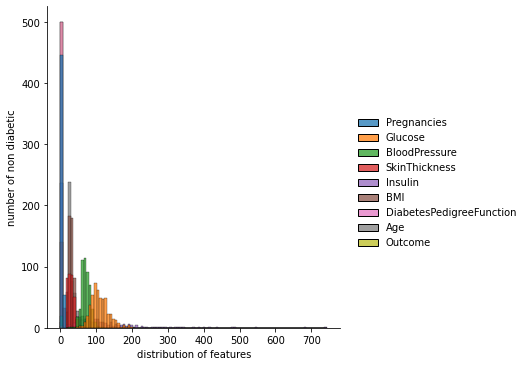

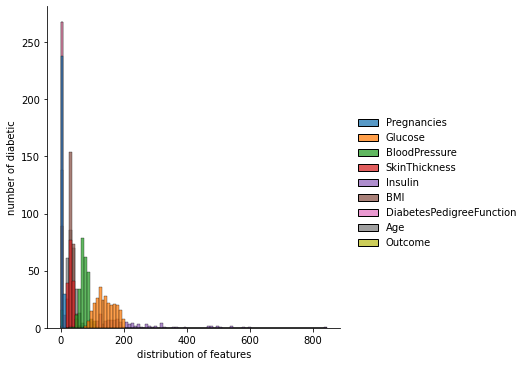

In [ ]:
#Plot the histograms of the variables. Visualize the difference in distribution between diabetics and non-diabetics with separate plots using Seaborn. Create a subplot of 3 X 3 and plot a density plot for each variable. Hide the 9th subplot.

plt.figure(figsize=(20,10))

non_diabetic =sns.displot(dia_data.loc[dia_data.Outcome==0])
non_diabetic.set(xlabel="distribution of features", ylabel = "number of non diabetic")
diabetics=sns.displot(dia_data.loc[dia_data.Outcome==1])
diabetics.set(xlabel="distribution of features", ylabel = "number of diabetic")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


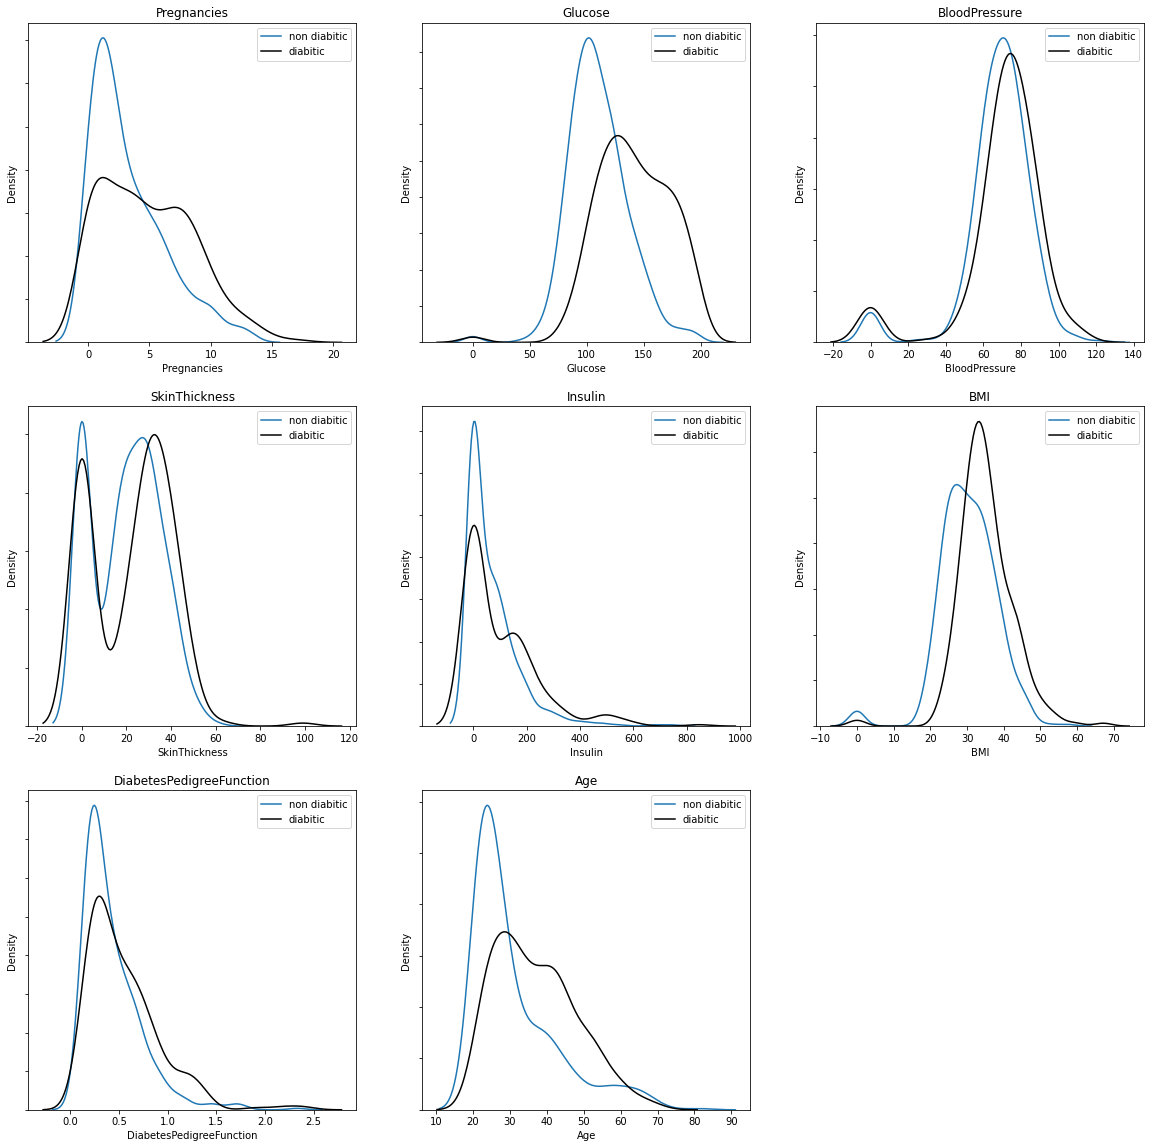

In [ ]:
#variable graphs
#code refernce https://www.javaer101.com/en/article/18781061.html
fig,ax =  plt.subplots(3,3,figsize = (20,20))

for index,col_name in enumerate(dia_data.columns):
  ax=plt.subplot(3,3,index+1)
  ax.yaxis.set_ticklabels([])
  sns.kdeplot(dia_data.loc[dia_data.Outcome==0][col_name],label="non diabitic")
  sns.kdeplot(dia_data.loc[dia_data.Outcome==1][col_name],color='black',label="diabitic")
  ax.set_title(col_name)
  plt.legend()
plt.subplot(3,3,9).set_visible(False)
  
  




In [ ]:
#checking for the null data
dia_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#printing the columns with number of 0's 
for col in dia_data.columns:
  #print(col)
  zero_rows=dia_data.loc[dia_data[col]==0].shape[0]
  print(col+'  '+str(zero_rows))

Pregnancies  111
Glucose  5
BloodPressure  35
SkinThickness  227
Insulin  374
BMI  11
DiabetesPedigreeFunction  0
Age  0
Outcome  500


In [ ]:
#heck the data (null data and number of rows with 0 for each variable). Replace the zero values with NaN. Re-check the data.   

import numpy as np

dia_data['Pregnancies']=dia_data['Pregnancies'].replace(0,np.nan)
dia_data['Glucose']=dia_data['Glucose'].replace(0,np.nan)
dia_data['BloodPressure']=dia_data['BloodPressure'].replace(0,np.nan)
dia_data['SkinThickness']=dia_data['SkinThickness'].replace(0,np.nan)
dia_data['Insulin']=dia_data['Insulin'].replace(0,np.nan)
dia_data['BMI']=dia_data['BMI'].replace(0,np.nan)






dia_data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:


dia_data['Pregnancies']=dia_data['Pregnancies'].fillna(dia_data['Pregnancies'].mean())
dia_data['Glucose']=dia_data['Glucose'].fillna(dia_data['Glucose'].mean())
dia_data['BloodPressure']=dia_data['BloodPressure'].fillna(dia_data['BloodPressure'].mean())
dia_data['SkinThickness']=dia_data['SkinThickness'].fillna(dia_data['SkinThickness'].mean())
dia_data['Insulin']=dia_data['Insulin'].fillna(dia_data['Insulin'].mean())
dia_data['BMI']=dia_data['BMI'].fillna(dia_data['BMI'].mean())
dia_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
##Standardize the data. Take a look at the mean, std. deviation, and the maximum of each of the transformed variables. 
#standardizing the data
from sklearn.preprocessing import StandardScaler

x=dia_data.drop(['Outcome'],axis=1)
y=dia_data['Outcome']

scale = StandardScaler().fit(x)
X=scale.transform(x)
#print(X)
scaled_X=pd.DataFrame(X,columns=x.columns)


scaled_X.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.266705e-16,-3.301757e-16,6.966722e-16,6.866252e-16,-2.352033e-16,3.090699e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.175289e+00,-2.554131e+00,-4.004245e+00,-2.521670e+00,-1.665945e+00,-2.075119e+00,-1.189553e+00,-1.041549e+00
25%,-8.389806e-01,-7.212214e-01,-6.953060e-01,-4.727737e-01,-4.007289e-01,-7.215397e-01,-6.889685e-01,-7.862862e-01
50%,2.987023e-16,-1.540881e-01,-1.675912e-02,8.087936e-16,-3.345079e-16,-8.363615e-03,-3.001282e-01,-3.608474e-01
75%,5.062549e-01,6.103090e-01,6.282695e-01,3.240194e-01,-3.345079e-16,6.029301e-01,4.662269e-01,6.602056e-01
max,4.205652e+00,2.541850e+00,4.102655e+00,7.950467e+00,8.126238e+00,5.042087e+00,5.883565e+00,4.063716e+00


In [ ]:
#printing the mean, max and standard deviation
print('the mean of the colums is',scaled_X.mean(axis=0))
print('the maximum value of each of the  colums is',scaled_X.max(axis=0))
print('the standatd deviation is',scaled_X.std(axis=0))


the mean of the colums is Pregnancies                 2.266705e-16
Glucose                    -3.301757e-16
BloodPressure               6.966722e-16
SkinThickness               6.866252e-16
Insulin                    -2.352033e-16
BMI                         3.090699e-16
DiabetesPedigreeFunction    2.398978e-16
Age                         1.857600e-16
dtype: float64
the maximum value of each of the  colums is Pregnancies                 4.205652
Glucose                     2.541850
BloodPressure               4.102655
SkinThickness               7.950467
Insulin                     8.126238
BMI                         5.042087
DiabetesPedigreeFunction    5.883565
Age                         4.063716
dtype: float64
the standatd deviation is Pregnancies                 1.000652
Glucose                     1.000652
BloodPressure               1.000652
SkinThickness               1.000652
Insulin                     1.000652
BMI                         1.000652
DiabetesPedigreeFunction    

In [ ]:
#reate a train and test set (80/20).
# Use the sequential class from Keras to build the MLP. Add two hidden layers (with the respective node values of 32 and 16, ‘relu’ activation) and one hidden layer (‘sigmoid’ activation for output layer). Use ‘adam’ optimizer and ‘binary crossentropy’ loss. What does cross-entropy mean and refer to?

#code refernce : https://subscription.packtpub.com/book/programming/9781838821654/1/ch01lvl1sec04/3-multilayer-perceptron-mlp

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.20, random_state=42)
print('the no of rows in training set is',len(X_train))
print('the no of rows in test set is',len(X_test))

from keras.models import Sequential

mlp_model=Sequential()

from keras.layers import Dense
mlp_model.add(Dense(32,activation='relu'))

mlp_model.add(Dense(16,activation='relu'))

mlp_model.add(Dense(1,activation='sigmoid'))

mlp_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

mlp_model.fit(X_train,y_train,epochs=200)

the no of rows in training set is 614
the no of rows in test set is 154
Epoch 1/200
20/20 [==============================] - 1s 1ms/step - loss: 0.7751 - accuracy: 0.3794
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.4560
Epoch 3/200
20/20 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.7298
Epoch 4/200
20/20 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7646
Epoch 5/200
20/20 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.7757
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7945
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7921
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7612
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7540
Epoch 10/200
20/20 [=================

Crossentropy is defined as a measure of the difference between two probability distributions for a given random variable or set of events. in the above scenario we were using a binary crossentenropy loss function which means we are performing binary classification and our output can only have one of the two values. The crossentenropy in this case calculates the difference between the two probability distributions i.e the probability distribution of diabitic and non diabitic.

Epoch: it is a hyperparameter in neural networks that specify the the number times that the learning algorithm will work through the entire training dataset.
In our case at the 100th epoch the accuracy was 86% ane the loss was around 30 %
Epoch 100/200
**20/20 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8699**

But at the 200th Epoch the the accuracy was 89% ane the loss was around 23%
Epoch 200/200
**20/20 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.8949 **

This implies that in case of our dataset as we increse the number of epochs the accuracy increases and the loss decreases.

In [ ]:
#Evaluate the training and testing sets’ accuracy. 
train_score=mlp_model.evaluate(X_train,y_train)
print(train_score)

test_score=mlp_model.evaluate(X_test,y_test)
print(test_score)

20/20 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8909
[0.2537168264389038, 0.8908794522285461]
5/5 [==============================] - 0s 3ms/step - loss: 0.7256 - accuracy: 0.7143
[0.7255563139915466, 0.7142857313156128]


In the above case we can see that even though the training accuracy was 89% the test accuracy is 70% this means that our model is a good model but we need to tune the hhyperparameters further to get a better test accuracy score

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        99
           1       0.60      0.58      0.59        55

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.71      0.71       154



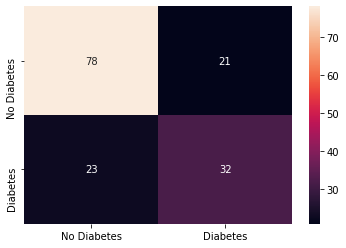

In [ ]:
#Provide the confusion matrix using Seaborn. What are your conclusions?

#code refence for seaborn https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix,classification_report

test_prediction=(mlp_model.predict(X_test) > 0.5).astype("int32")
class_matrix=confusion_matrix(y_test,test_prediction)

sns.heatmap(class_matrix,annot=True,xticklabels=['No Diabetes','Diabetes'],yticklabels=['No Diabetes','Diabetes'])

class_report=classification_report(y_test,test_prediction)
print(class_report)


From the above confusion matrix we can see that when the model is good when predicting the true negatives and true positives but when it comes to false negatives the number of wrong predictions are around 21 which can be harmful for people who have diabetes and are predicted as non diabitic. the false positives are also around 24 which might not be as harmful as the false negatives, but the numbers are not good. Hence the model needs to be further tuned for better scores.

No handles with labels found to put in legend.


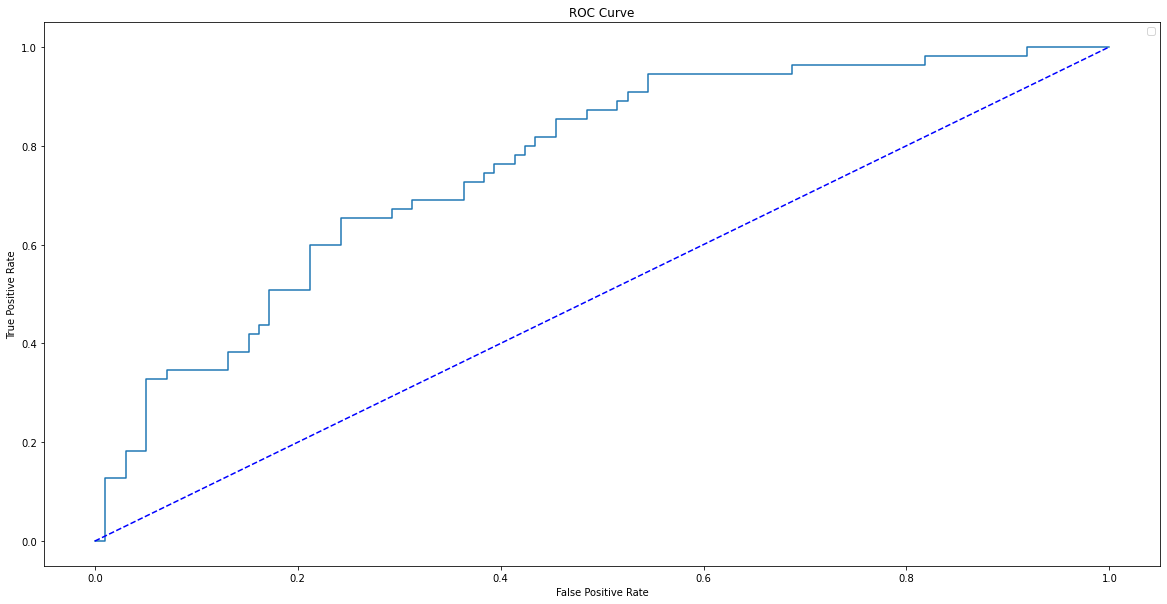

In [ ]:
#Provide the ROC graph. What is the area under the curve? What are your conclusions?

#code refrence https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
from sklearn.metrics import roc_curve
from sklearn import metrics

probabilty_pred=mlp_model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, probabilty_pred)
auc = metrics.roc_auc_score(y_test, probabilty_pred)
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

from the ROC curve we can see that the model performs  well which means that the model is able to differntiate between different classes and make good predictions.

In [ ]:
# Is the MLP better than a logistic regression model? Do you get a better accuracy with a Random Forest model? Why? Show the outcomes of the different models in a table format
#code refernce https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
seed=42
models = []
models.append(('LR', LogisticRegression()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  clf=model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  results.append(accuracy)
  names.append(name)
  #print(results)
  dictionary = dict(zip(names, results))
  #print(msg)
print(dictionary)
new = pd.DataFrame.from_dict(dictionary,orient ='index')
new.columns =[ 'Accuracy_Score']
new.head()

{'LR': 0.7597402597402597, 'RandomForest': 0.7532467532467533, 'SVM': 0.7467532467532467, 'NB': 0.7467532467532467}


,Accuracy_Score
LR,0.759740
RandomForest,0.753247
SVM,0.746753
NB,0.746753


from the above table we can see that the testing scores of Logistic regression and Random forest and other classifiers like SVM and naive Bayes are slightly higher than that of the MLP model.

the reason being that models like random Forest,Logistic regression and SVM and  other ensemble models are based on the principles of feature selection i.e they start classifying based on the best possible features for predicting  the outcome which is not the case for Neural networks also the other models in this scenario work better with structured data whereas nerual networks work best with unstructured data.